# Ajuste de curvas aos casos de COVID-19 em Macaé 

In [1]:
import numpy as np
from scipy import optimize as opt
import csv
import matplotlib.pyplot as plt

Preparando os dados

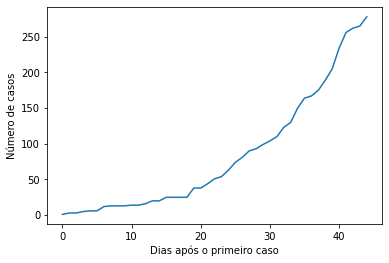

In [2]:
data = []
with open('CoronavirusMacae.csv') as raw_data:
    first_row = True
    for row in csv.reader(raw_data, delimiter=','):
        if first_row:
            first_row = False
            continue
        # Take the confirmed cases
        cases = int(row[1])
        if cases != 0:
            # Add the nonzero cases to data list
            data.append(cases)

# Create time line, x values for data
x_values = np.arange(len(data), dtype=np.float)

# Convert data list to numpy array of float
data = np.array(data, dtype=np.float)

# Plot it for verification
plt.plot(x_values, data)
plt.xlabel('Dias após o primeiro caso')
plt.ylabel('Número de casos')
plt.show()

Ajustando as curvas

In [3]:
# Function model, an exponential curve
def f1(x, *args):
    base, a, b = args
    return a * np.power(base, x) + b

# Function model, pure exponential curve
def f2(x, *args):
    base, a = args
    return a * np.power(base, x)

# Quadratic function
def quad(x, *args):
    a, c = args
    return a * x*x + c

f1_opt, _ = opt.curve_fit(f1, x_values, data, p0 = (2, 1, 1))
f2_opt, _ = opt.curve_fit(f2, x_values, data, p0 = (2, 1))
quad_opt, _ = opt.curve_fit(quad, x_values, data, p0 = (1, 1))

plt.figure('Ajustes', figsize=(12, 10))

# Plot it for verification
plt.plot(x_values, data, linewidth=2, label='Dados Reais')
plt.plot(x_values, quad(x_values, *quad_opt), linewidth=1, label='Parábola')
plt.plot(x_values, f2(x_values, *f2_opt), linewidth=1, label='Exponencial simples')
plt.plot(x_values, f1(x_values, *f1_opt), linewidth=1, label='Exponencial')

plt.legend()
plt.show()

print(f1_opt, f2_opt, quad_opt)

[  1.06800078  17.39975746 -19.74191324] [1.0819465  9.48511912] [ 0.14019267 -7.14352394]


Extrapolando a curva para 10 dias.

In [4]:
x_extrapolate = np.arange(len(data)+10, dtype=np.float)

plt.figure('Ajustes', figsize=(12, 10))

# Plot it for verification
plt.plot(x_values, data, linewidth=2, label='Dados Reais')
plt.plot(x_extrapolate, quad(x_extrapolate, *quad_opt), linewidth=1, label='Parábola')
plt.plot(x_extrapolate, f2(x_extrapolate, *f2_opt), linewidth=1, label='Exponencial simples')
plt.plot(x_extrapolate, f1(x_extrapolate, *f1_opt), linewidth=1, label='Exponencial')

plt.legend()
plt.show()